# DEFAULT RATE PREDICTION


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
 

In [ ]:
# Loading the dataset
#dataset=pd.read_csv('desktop/default_rate.csv')
dataset = pd.read_csv(r"C:\Users\hp\Default_Rate.csv")


In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
dataset.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [ ]:
dataset.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [ ]:
dataset.describe()


,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


In [ ]:
dataset.columns


Index(['default', 'student', 'balance', 'income'], dtype='object')

In [ ]:

dataset['default'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
label_default = LabelEncoder()

In [ ]:
#Processing Data
dataset['default'] = label_default.fit_transform(dataset['default'])

In [ ]:
# Non- defaulters = 0
# Defaulters = 1
dataset['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [ ]:
#Processing Data
dataset['student'] = label_default.fit_transform(dataset['student'])

In [ ]:
# students = 1
# non-students = 0
dataset['student'].value_counts()

0    7056
1    2944
Name: student, dtype: int64

In [ ]:
dataset['student'].unique()

array([0, 1], dtype=int64)

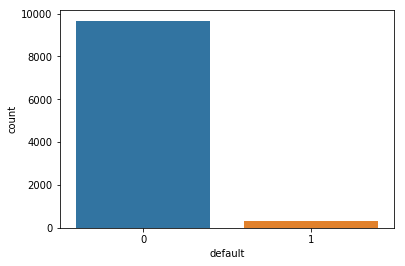

In [ ]:
sns.countplot(dataset['default'])

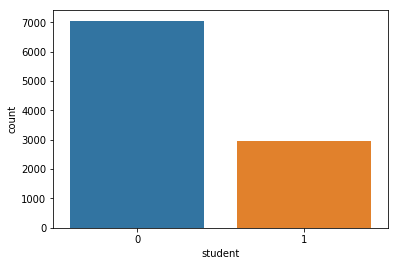

In [ ]:
sns.countplot(dataset['student'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018AE0E627B8>]],
      dtype=object)

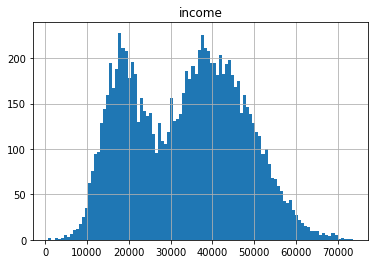

In [ ]:
dataset.hist(column='income', bins=100)

In [ ]:
#seperating datasets as response and feature variables --18:11
X = dataset.drop('default', axis = 1)
y = dataset['default']

In [ ]:
#Trainning and testing data

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 20)

In [ ]:

# No of Training data 
len(X_train)
len(X_test)
X_train

array([[-0.64953616, -1.0641174 ,  0.23928657],
       [ 1.53956018,  1.4784289 , -0.85261354],
       [-0.64953616,  0.2353952 ,  0.54206297],
       ...,
       [-0.64953616,  0.2525392 ,  1.20658741],
       [-0.64953616,  0.40412496,  0.86418358],
       [ 1.53956018,  1.00397253, -1.30596774]])

In [ ]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [ ]:
#first 10 trainned data
X_train[:10]

array([[-0.64953616, -1.0641174 ,  0.23928657],
       [ 1.53956018,  1.4784289 , -0.85261354],
       [-0.64953616,  0.2353952 ,  0.54206297],
       [ 1.53956018, -0.15432172, -0.85769719],
       [-0.64953616,  0.86542525, -0.29319851],
       [-0.64953616, -0.9465995 ,  0.68234734],
       [-0.64953616,  0.96124137,  0.18575361],
       [ 1.53956018,  0.34694454, -0.93206056],
       [-0.64953616, -0.9075598 ,  1.0222084 ],
       [ 1.53956018, -0.5241573 , -1.12119068]])

# Random Forest Classifier

In [ ]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
pred_rfc[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Y_pred = rfc.predict(x_test)

In [ ]:
rfc_acc = accuracy_score(y_test,Y_pred)*100
rfc_acc

97.43333333333334

In [ ]:
#Model Performance

print (classification_report (y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      2916
          1       0.57      0.29      0.38        84

avg / total       0.97      0.97      0.97      3000

[[2898   18]
 [  60   24]]


# SVM Classifier


In [ ]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [ ]:
#Model Performance
print (classification_report (y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2916
          1       0.85      0.26      0.40        84

avg / total       0.98      0.98      0.97      3000

[[2912    4]
 [  62   22]]


# Neural Network

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes =(10,10,10), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [ ]:
#Model Performance
print (classification_report (y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2916
          1       0.77      0.32      0.45        84

avg / total       0.97      0.98      0.97      3000

[[2908    8]
 [  57   27]]


In [ ]:
from sklearn.metrics import accuracy_score
bestmodel = accuracy_score(y_test, pred_clf)
bestmodel

0.978

In [ ]:
dataset.head(10)

,default,student,balance,income
0,0,0,729.526495,44361.625070
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138950
3,0,0,529.250605,35704.493940
4,0,0,785.655883,38463.495880
5,0,1,919.588530,7491.558572
6,0,0,825.513330,24905.226580
7,0,1,808.667504,17600.451340
8,0,0,1161.057854,37468.529290
9,0,0,0.000000,29275.268290


In [ ]:
The SVM Classifier has proved to be the most precise model with the data that was given.
Its accuracy level is at 98% while that of Neural network and Random forest classifier are at 97%